In [2]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

from src.base.ealgorithm import EA
from src.base.algorithms import selection as sel, mutation as mut, crossover as cx

In [3]:
def plot_waveform(
    target: np.ndarray, generated: np.ndarray, title: str = None, font_size: int = None
) -> None:
    plt.figure(figsize=(15, 3))
    if title:
        if font_size:
            plt.title(title, fontsize=font_size)
        else:
            plt.title(title)
    plt.plot(generated)
    plt.plot(target, alpha=0.8)
    plt.show()


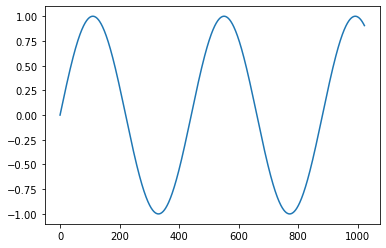

In [4]:
data100hz, samplerate = sf.read("files/100hz.flac")
plt.plot(data100hz)

## Algorithms

In [4]:
ea = EA(data100hz, 100, 300)

### Crossover Comparison

In [5]:
crossovers = [cx.simple_one_point, cx.simple_two_point, cx.single_arithmetic]

In [6]:
ea.set_mutation(mut.uniform_mutation)
ea.set_selection(sel.select_best)

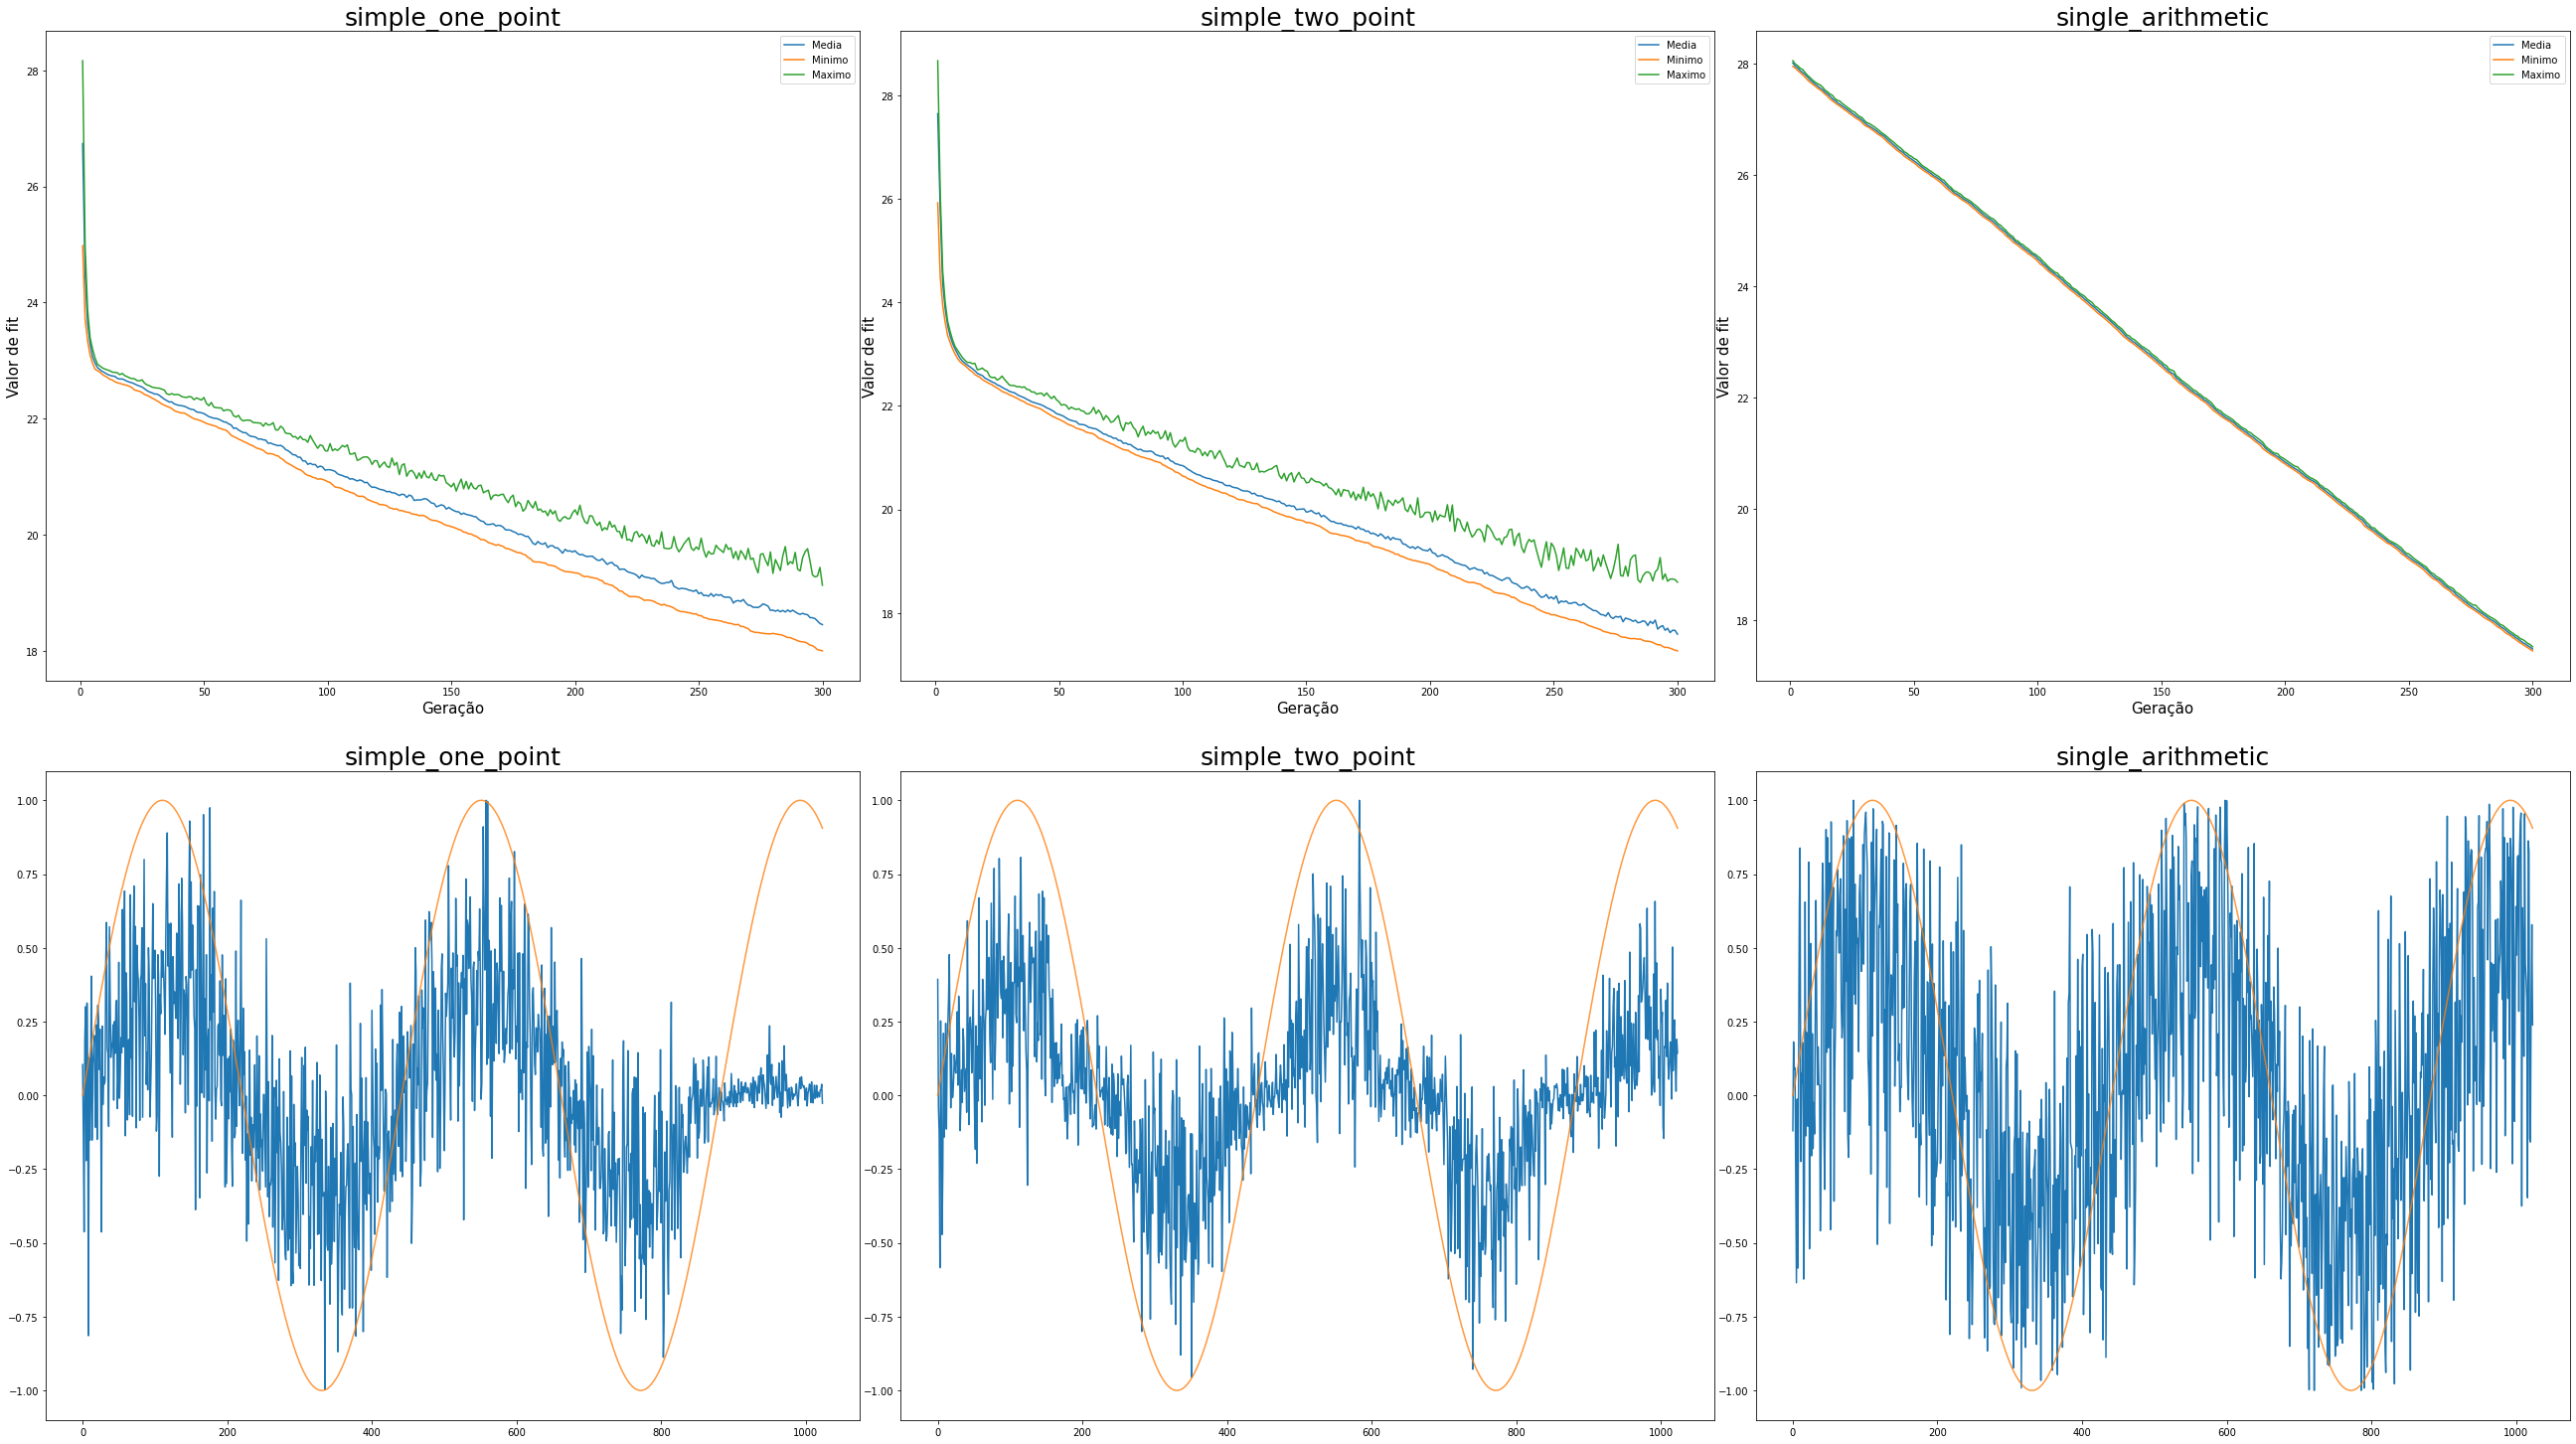

In [9]:
size = len(crossovers)

fig, ax = plt.subplots(2, size, figsize=(size*12,20))
fig.tight_layout(h_pad=7)

for i in range(size):
    ea.set_crossover(crossovers[i])
    result, log = ea.run()
    title = crossovers[i].__name__
    ax[0, i].set_title(title, fontsize=25)
    ax[0, i].plot(log["gen"], log["mean"], label="Media")
    ax[0, i].plot(log["gen"], log["min"], label="Minimo")
    ax[0, i].plot(log["gen"], log["max"], label="Maximo")
    ax[0, i].legend()
    ax[0, i].set_xlabel("Geração", fontsize=15)
    ax[0, i].set_ylabel("Valor de fit", fontsize=15)
    ax[1, i].set_title(title, fontsize=25)
    ax[1, i].plot(result)
    ax[1, i].plot(data100hz, alpha=0.8)


#### Mutation Comparison

In [15]:
mutation = [mut.shuffle_indexes, mut.uniform_mutation]

In [16]:
ea.set_crossover(cx.simple_two_point)
ea.set_selection(sel.select_best)

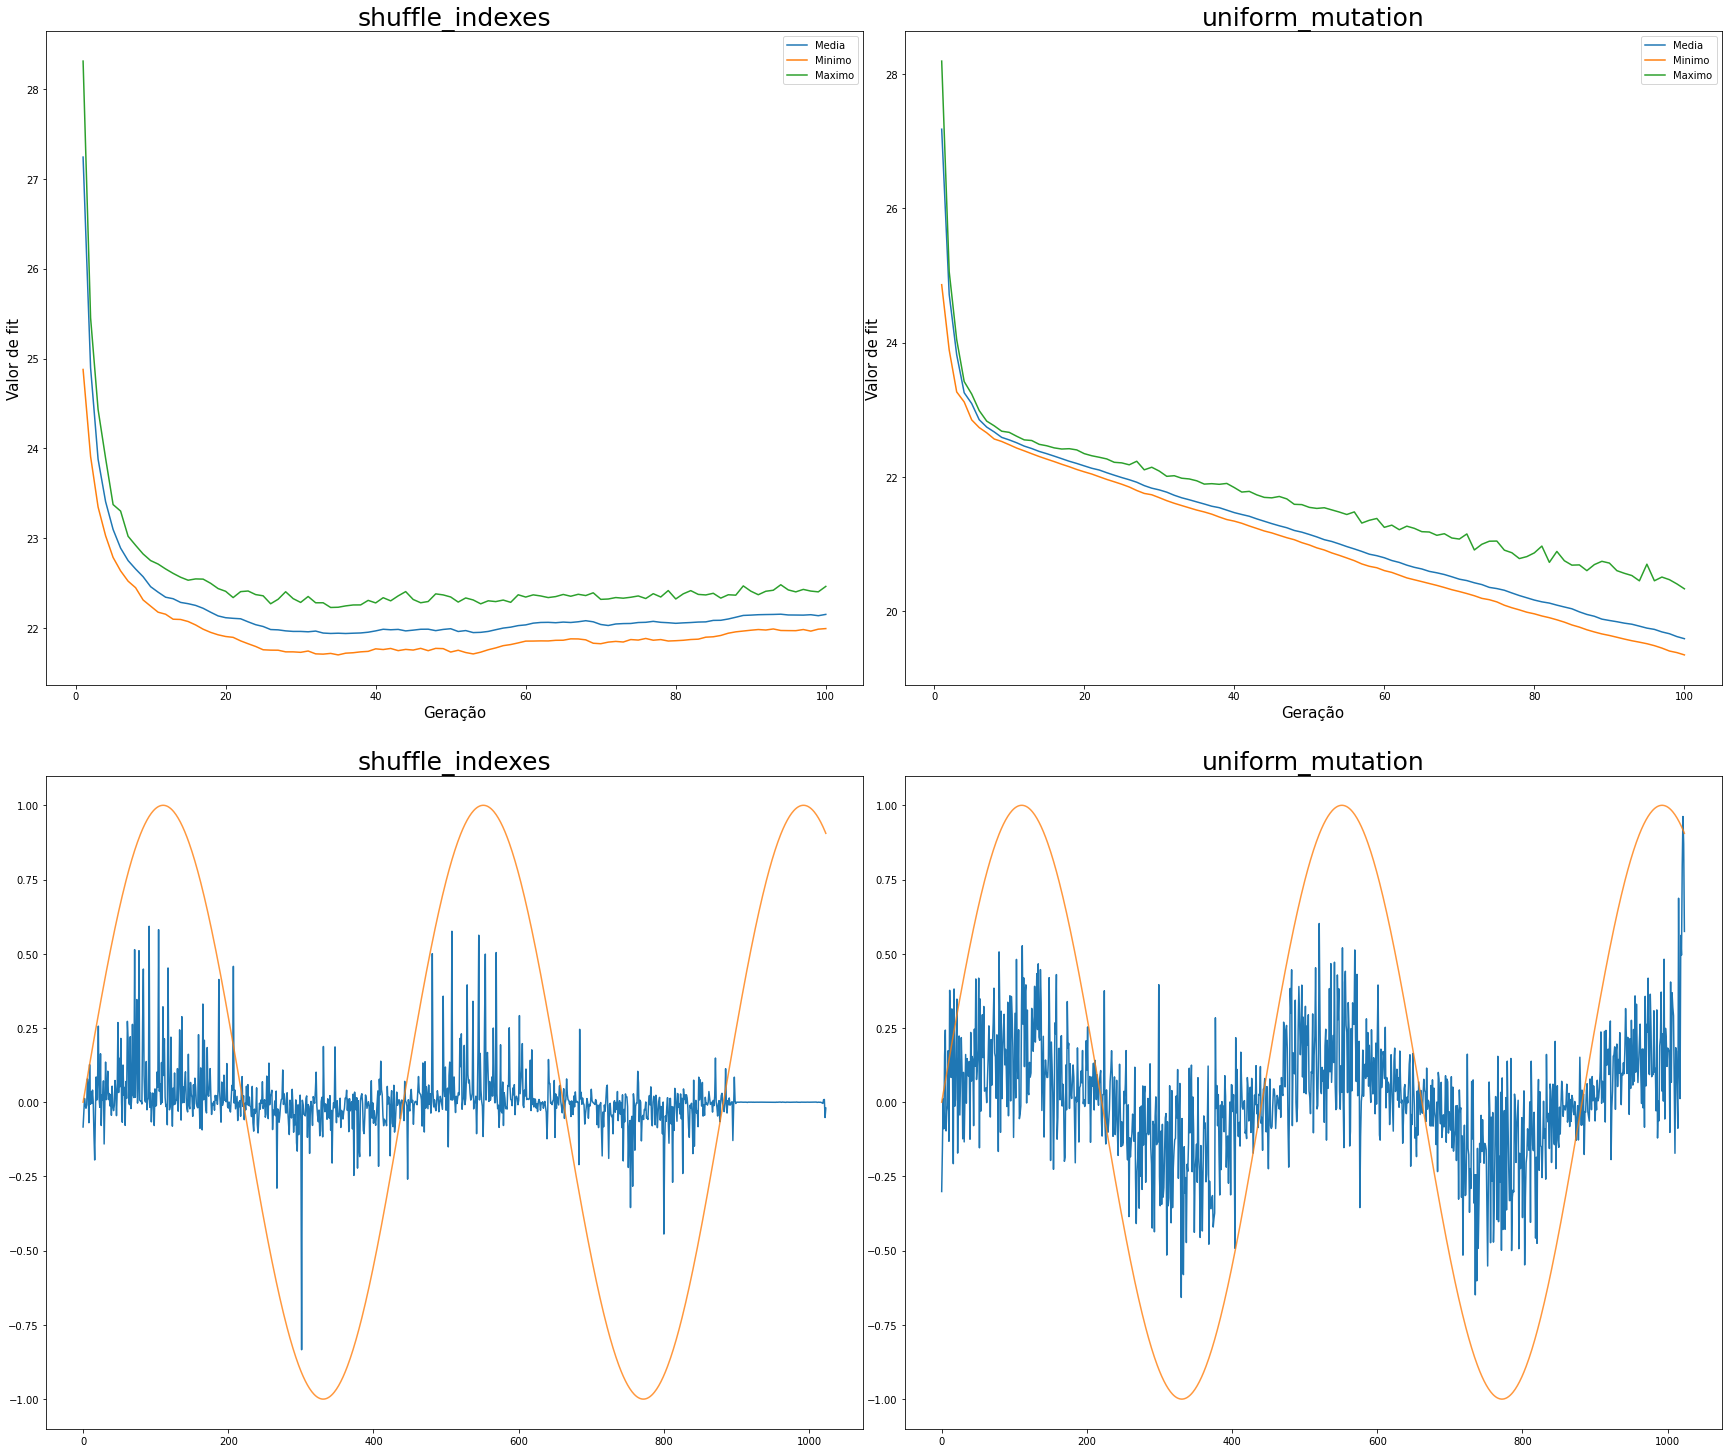

In [17]:
size = len(mutation)

fig, ax = plt.subplots(2, size, figsize=(size*12,20))
fig.tight_layout(h_pad=7)

for i in range(size):
    ea.set_mutation(mutation[i])
    result, log = ea.run()
    title = mutation[i].__name__
    ax[0, i].set_title(title, fontsize=25)
    ax[0, i].plot(log["gen"], log["mean"], label="Media")
    ax[0, i].plot(log["gen"], log["min"], label="Minimo")
    ax[0, i].plot(log["gen"], log["max"], label="Maximo")
    ax[0, i].legend()
    ax[0, i].set_xlabel("Geração", fontsize=15)
    ax[0, i].set_ylabel("Valor de fit", fontsize=15)
    ax[1, i].set_title(title, fontsize=25)
    ax[1, i].plot(result)
    ax[1, i].plot(data100hz, alpha=0.8)

## Parameters

### Population Size

In [18]:
pop = [i for i in range(100, 3001, 100)]

results = []
logs = []

In [19]:
for p in pop:
    ea = EA(data100hz, p, 100)
    ea.set_crossover(cx.simple_two_point)
    ea.set_mutation(mut.uniform_mutation)
    ea.set_selection(sel.select_best)
    result, log = ea.run()
    results.append(result)
    logs.append(log)

In [20]:
mins = []
maxs = []
means = []

for log in logs:
    mins.append(log["min"][-1])
    maxs.append(log["max"][-1])
    means.append(log["mean"][-1])

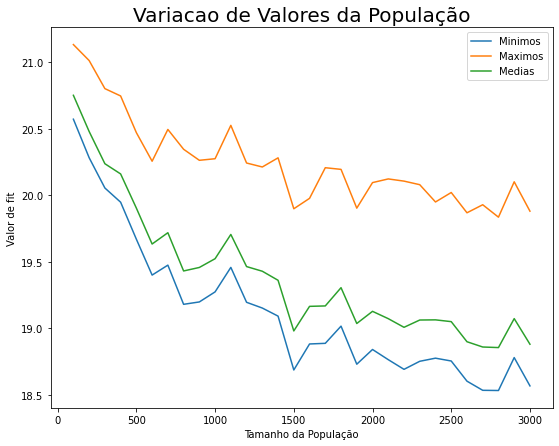

In [21]:
plt.figure(figsize=(9, 7))
plt.title("Variacao de Valores da População", fontsize=20)
plt.plot(pop, mins, label="Minimos")
plt.plot(pop, maxs, label="Maximos")
plt.plot(pop, means, label="Medias")
plt.xlabel("Tamanho da População")
plt.ylabel("Valor de fit")
plt.legend()

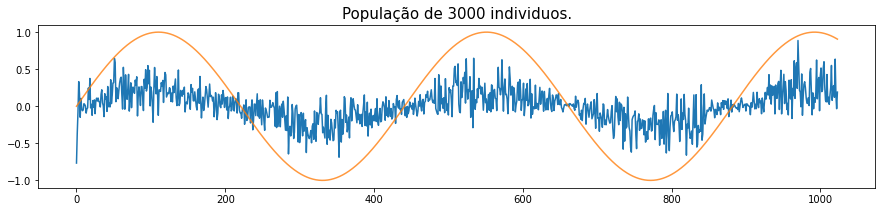

In [22]:
plot_waveform(data100hz, results[-1], title=f"População de {pop[-1]} individuos.", font_size=15)

### Max generations

In [4]:
gens = [i for i in range(100, 1001, 50)]

results = []
logs = []

In [5]:
for g in gens:
    ea = EA(data100hz, 3000, g)  # pop size por causa do resultado anterior
    ea.set_crossover(cx.simple_two_point)
    ea.set_mutation(mut.uniform_mutation)
    ea.set_selection(sel.select_best)
    result, log = ea.run()
    results.append(result)
    logs.append(log)


In [6]:
mins = []
maxs = []
means = []

for log in logs:
    mins.append(log["min"][-1])
    maxs.append(log["max"][-1])
    means.append(log["mean"][-1])

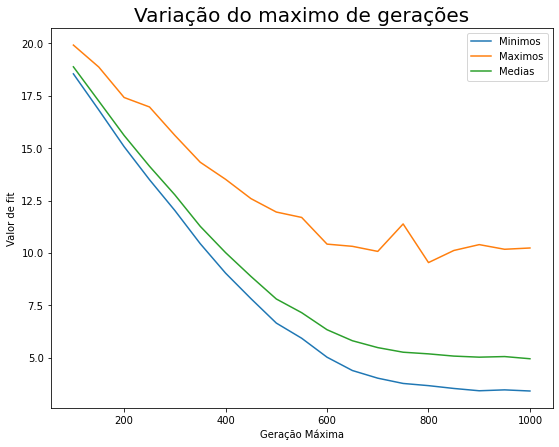

In [7]:
plt.figure(figsize=(9, 7))
plt.title("Variação do maximo de gerações", fontsize=20)
plt.plot(gens, mins, label="Minimos")
plt.plot(gens, maxs, label="Maximos")
plt.plot(gens, means, label="Medias")
plt.xlabel("Geração Máxima")
plt.ylabel("Valor de fit")
plt.legend()


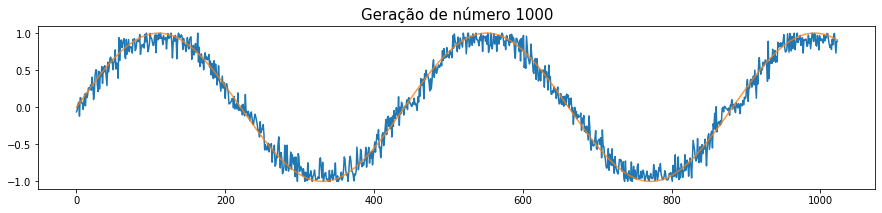

In [8]:
plot_waveform(data100hz, results[-1], title=f"Geração de número {gens[-1]}", font_size=15)


## Resultados

In [6]:
ea = EA(data100hz, 3000, 1000)
ea.set_selection(sel.select_best)
ea.set_mutation(mut.uniform_mutation)
ea.set_crossover(cx.simple_two_point)

In [7]:
result, log = ea.run()

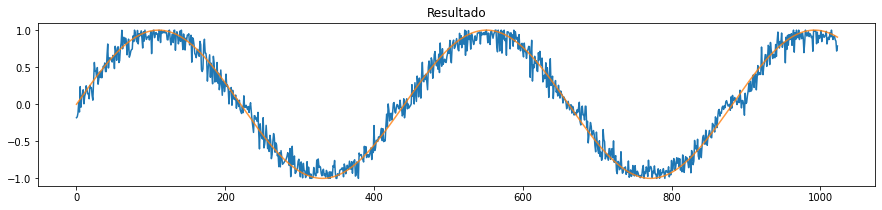

In [32]:
plot_waveform(data100hz, result, title="Resultado")

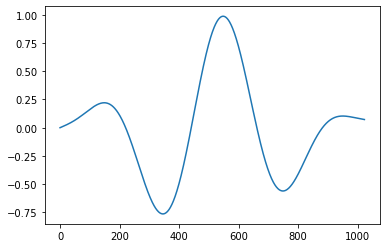

In [24]:
plt.plot(data100hz * np.hamming(len(data100hz)))

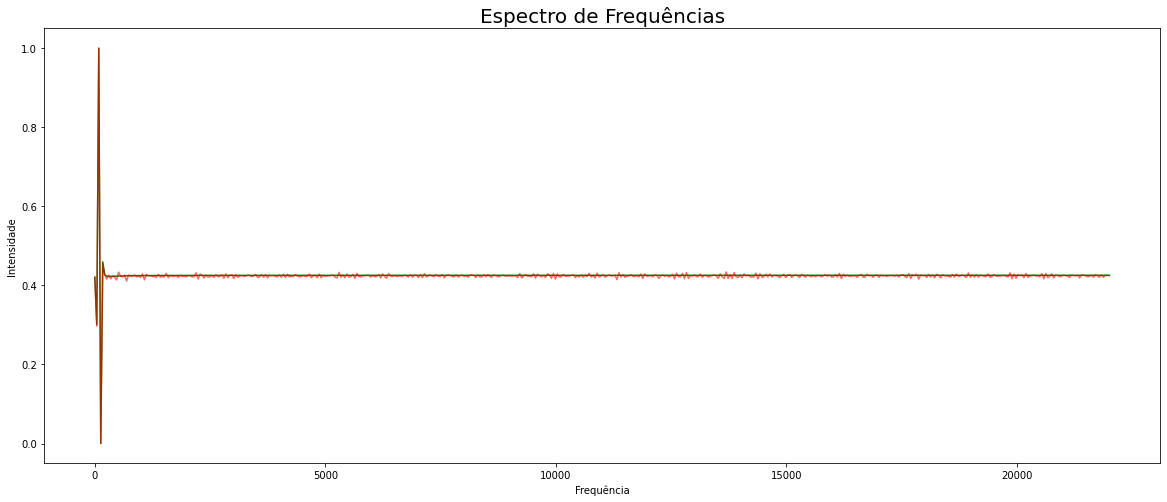

In [34]:
from numpy import fft
plt.figure(figsize=(20, 8))
plt.title("Espectro de Frequências", fontsize=20)

sig_freq = fft.fft(data100hz * np.hamming(data100hz.shape[0]))
N = data100hz.shape[0]
df = samplerate/N
N = int(N/2)
sig_freq = sig_freq[:N]
sample_index = np.arange(N)
f = sample_index*df
# normalize sig freq
Y = (sig_freq - np.min(sig_freq)) / (np.max(sig_freq) - np.min(sig_freq))
# f = (f - np.min(f)) / (np.max(f) - np.min(f))
plt.xlabel("Frequência")
plt.ylabel("Intensidade")
plt.plot(f, np.abs(Y), alpha=1, c="green")


sig_freq = fft.fft(result * np.hamming(result.shape[0]))
sig_freq = sig_freq[:N]
sample_index = np.arange(N)
f = sample_index*df
# normalize sig freq
Y = (sig_freq - np.min(sig_freq)) / (np.max(sig_freq) - np.min(sig_freq))
plt.plot(f, np.abs(Y), alpha=0.6, c="red")